<a href="https://colab.research.google.com/github/shinjeongdong/MLDeeplearningStudy/blob/main/3_2_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
#또 테스트와 훈련으로 나누자
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state = 42)

#그리고 2차원 배열로 만들어줘여한다
train_input = train_input.reshape(-1,1)

test_input = test_input.reshape(-1,1)



In [3]:
from sklearn.linear_model import LinearRegression

#선형회귀 클래스
lr = LinearRegression()
#모델 훈련
lr.fit(train_input,train_target)

print(lr.predict([[50]]))

#선형 회귀는 선형이기 때문에 직선 = 1차함수 wx+b w는 가중치 b는 편향이다. 쉽게 생각해서 기울기와 y절편이랑 동일함.
#그래서 선형회귀는 1차함수 그래프를 그려서 값을 예측하는거다.


print(lr.coef_,lr.intercept_) #기울기 39, y절편이 -709이다


[1241.83860323]
[39.01714496] -709.0186449535477


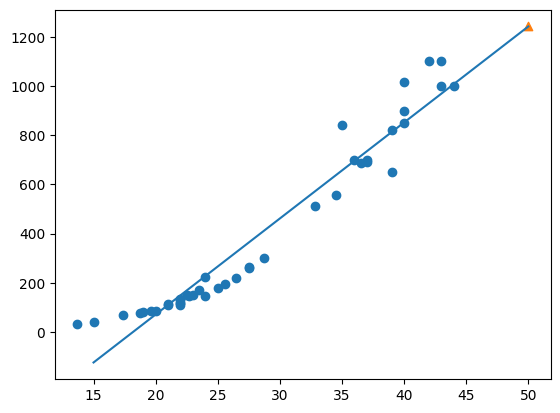

In [4]:
#그 그래프가 어떻게 생겼을까 그려보자

import matplotlib.pyplot as plt


plt.scatter(train_input,train_target)
#두 점을 잇는 1차 그래프를 그림
plt.plot([15,50],[15 * lr.coef_ + lr.intercept_ ,50 * lr.coef_ + lr.intercept_])

plt.scatter(50,1241.8,marker = "^")

plt.show()

print(lr.score(train_input,train_target)) #훈련
print(lr.score(test_input,test_target)) #테스트
#과대적합

#아래의 그래프의 문제점은 길이가 15로 가면 무게가  마이너스가 나온다 현실적으로 일어날수없음

#그래서 다항회귀를 쓸 생각을 하면 된다 ex): 2차함수 무게 = ax^2 + b * 길이 + c

In [9]:
train_poly = np.column_stack((train_input ** 2, train_input))
#다항 회귀 데이터 x^2 + x형태
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [10]:
lr = LinearRegression()

lr.fit(train_poly, train_target) #훈련 모델 생성

print(lr.predict([[50**2,50]])) #50cm의 무게 = 1573.98g

[1573.98423528]


In [11]:
print(lr.coef_, lr.intercept_)  #1.01x^2 -21.6x +116.05 이라는 그래프식이 나온다.
#그리고 2차방정식은 선형이 아니지 않냐는 질문에는 길이^2을 다른 변수로 치환을 하면 된다 길이^2 = 왕길이 이런식으로 :D

[  1.01433211 -21.55792498] 116.0502107827827


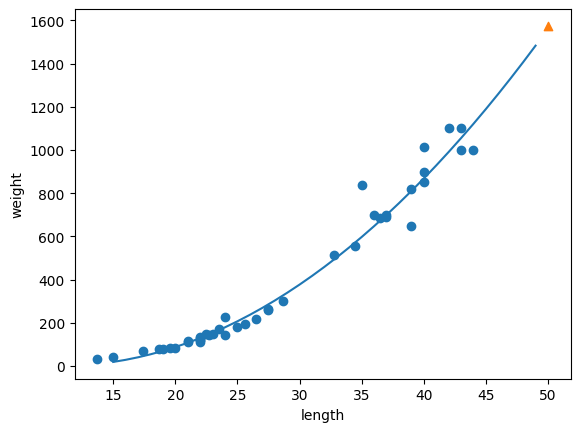

0.9706807451768623
0.9775935108325122


In [15]:
point = np.arange(15,50)

plt.scatter(train_input,train_target)

plt.plot(point,1.01 * point** 2 - 21.6 * point + 116.05)

plt.scatter(50,1574,marker = "^")
plt.xlabel('length')
plt.ylabel("weight")
plt.show()

print(lr.score(train_poly,train_target)) #0.9706807451768623
print(lr.score(test_poly,test_target)) #0.9775935108325122
